In [42]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as plcolors
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

data_path = "./Datasets/"
figs_path = "./Figures/"

plt.rcParams["font.family"] = "Times New Roman"

### Load Data
Daily minimum temperatures (southern hemisphere) dataset \
Can be found here: https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv

In [34]:
data = pd.read_csv(data_path+"daily_min_temp.csv", header=0, parse_dates=True, names=['Date','Temp'])

In [35]:
data.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [40]:
# split into day month year columns
data[["year", "month", "day"]] = data["Date"].str.split("-", expand=True)

### Group by Month

In [111]:
mn = data.groupby(['year', 'month'])
# add monthly averages
month_avg = mn.aggregate({"Temp":np.mean}).reset_index()
month_avg.columns = ['year', 'month', 'avg_temp']
# add monthly standard deviation
month_avg['std_temp'] = mn.aggregate({"Temp":np.std}).reset_index()['Temp']

In [112]:
# converting month and year columns from str to int type (will make them easier to use when plotting)
month_avg[["year", "month"]] = month_avg[["year", "month"]].apply(pd.to_numeric)

In [113]:
print(month_avg.head())

   year  month   avg_temp  std_temp
0  1981      1  17.712903  3.075358
1  1981      2  17.678571  2.913361
2  1981      3  13.500000  2.849444
3  1981      4  12.356667  3.227328
4  1981      5   9.490323  3.130214


### Plot as Time Series

C:\Users\pat99\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\pat99\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator


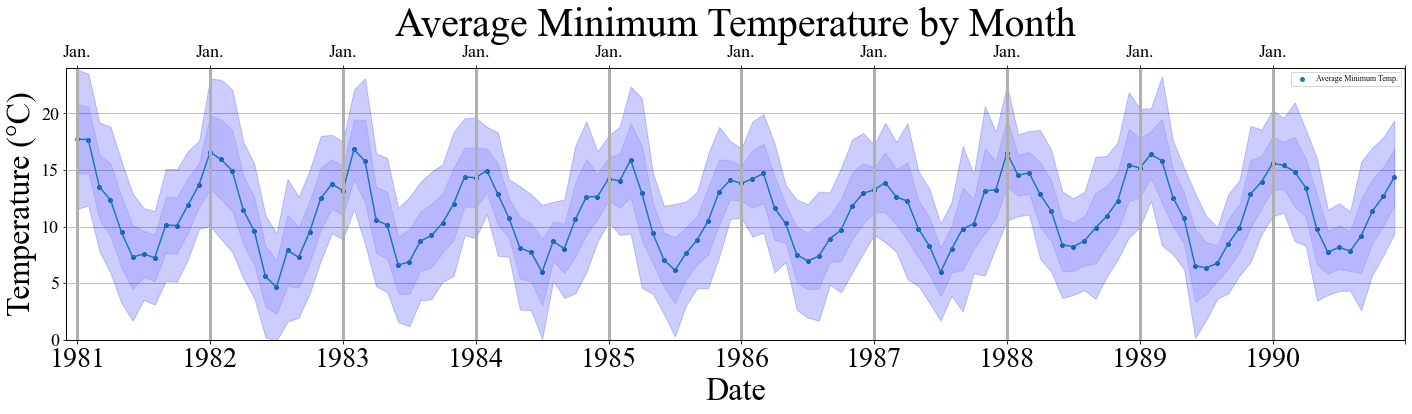

In [332]:
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(111)

# min-max of axes
ax.set_ylim([0, 24])
ax.set_xlim([-1, 101]) # set this correctly

# create a standard index
idx = list(month_avg.index)
idx.append(120)

# plot average
ax.plot(month_avg['avg_temp']) # line graph
ax.scatter(list(month_avg.index), month_avg['avg_temp'], s=15, label='Average Minimum Temp.') # scatter plot

# plotting standard deviation
# 1 std = 68%, 2 std = 95%
ax.fill_between(list(month_avg.index), month_avg['avg_temp']+month_avg['std_temp'], 
                month_avg['avg_temp']-month_avg['std_temp'], color='b', alpha=.1)
ax.fill_between(list(month_avg.index), month_avg['avg_temp']+(2*month_avg['std_temp']), 
                month_avg['avg_temp']-(2*month_avg['std_temp']), color='b', alpha=.2)


# customizing x labels as the year
xtick_locs = [float(i) for i in idx if (i)%12==0]
#xtic_locs = list(range(6,120,12))
xtick_labels = [str(i) for i in range(month_avg['year'][0], month_avg['year'][len(month_avg)-1]+1)]



# axis labels and ticks
plt.xlabel("Date", fontsize=32)
plt.ylabel("Temperature (°C)", fontsize=32)
ax.set_xticklabels(xtick_labels)
ax.set_xticks(xtick_locs)
plt.xticks(fontsize=28)
plt.yticks(fontsize=18)

# creating a second custom xaxis for months on top
ax2 = ax.twiny()
x2tick_locs = [float(i+1) for i in idx if (i)%12==0]
#x2tick_locs = list(range(1,120,12))
x2tick_labels = ['Jan.'] * 10

# setting the monthly ticks
ax2.set_xticklabels(x2tick_labels) # rotate
ax2.set_xticks(x2tick_locs)
plt.xticks(fontsize=18)



# creating position for gridlines (Probably a better way to do this)
# ax3 = ax.twiny()
# x3ticks_locs = [float(i+6)for i in idx[1::] if (i%12==0)]
# #x3ticks_locs = list(range(3, 120))
# x3tick_labels = ['July'] * 10
# ax3.set_xticklabels(x3tick_labels) # rotate
# ax3.set_xticks(x3ticks_locs)
# plt.xticks(fontsize=18)


# add gridlines
# ax3.set_axisbelow(True)
# ax3.grid()
ax2.set_axisbelow(True)
ax2.grid(lw=3)
ax.set_axisbelow(True)
ax.yaxis.grid()

# legend
ax.legend(loc='best', prop={"size":8})
    
# Title
plt.title("Average Minimum Temperature by Month", fontsize=40)

# saving
#plt.savefig(figs_path+"avg_min_temp.jpg", format='jpg', dpi=300, bbox_inches = 'tight')